In [81]:
!/usr/bin/python3 -m pip install 'pymongo[srv]'
!/usr/bin/python3 -m pip install dnspython

MONGO_URL = ""

In [82]:
from pymongo import MongoClient
import seaborn as sns
import pandas as pd
import numpy as np

client = MongoClient(MONGO_URL)
collection = client.practice.imageanalyzes

array = list(collection.find())

client.close()

df = pd.DataFrame(array, index=None)

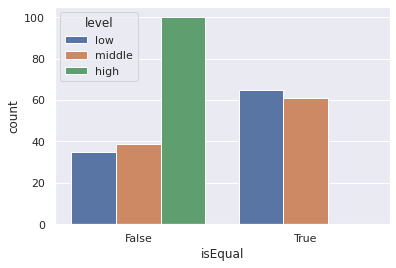

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(x="isEqual", hue="level", data=df)

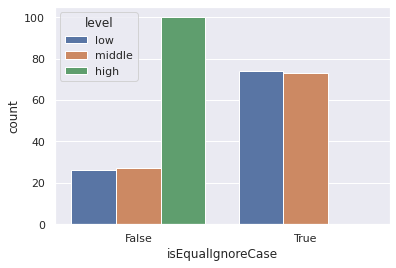

In [15]:
sns.set_theme(style="darkgrid")
sns.countplot(x="isEqualIgnoreCase", hue="level", data=df)

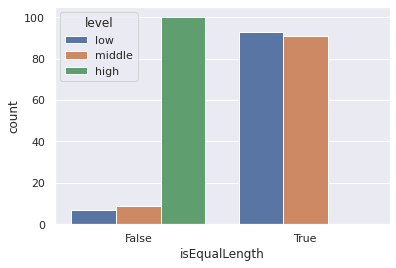

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(x="isEqualLength", hue="level", data=df)

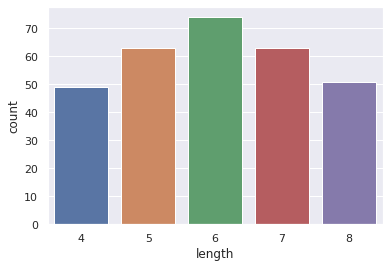

In [24]:
sns.set_theme(style="darkgrid")
sns.countplot(x="length", data=df);

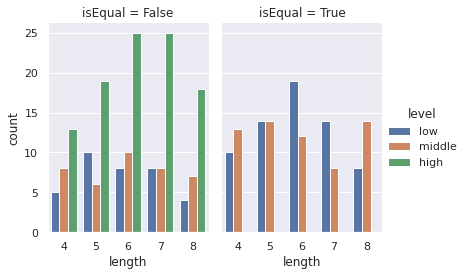

In [23]:
sns.set_theme(style="darkgrid")
sns.catplot(x="length", hue="level", col="isEqual",
                data=df, kind="count",
                height=4, aspect=.7);

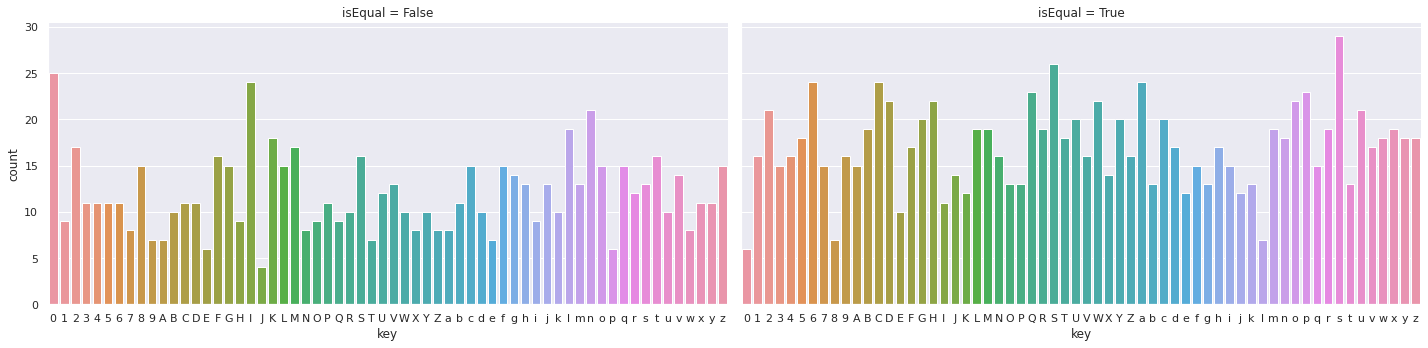

In [79]:
sns.set_theme(style="darkgrid")

# { 
#   key: A
#   isEqual: boolean   
#}
keyData = []

dfTemp = df.where(df['isEqualLength'] != 0)

for col in df.itertuples(index=False):
  for idx, character in enumerate([char for char in col.text]):
    if character != '':
      keyData.append({
          'key': character,
          'isEqual': col.equalityByLetters[idx]
      })

keyDf = pd.DataFrame(sorted(keyData, key=lambda k: k['key']), index=None)
sns.set(rc={'figure.figsize':(25.7,20.27)})


sns.catplot(x="key", col="isEqual",
                data=keyDf, kind="count", height=5, aspect=2);


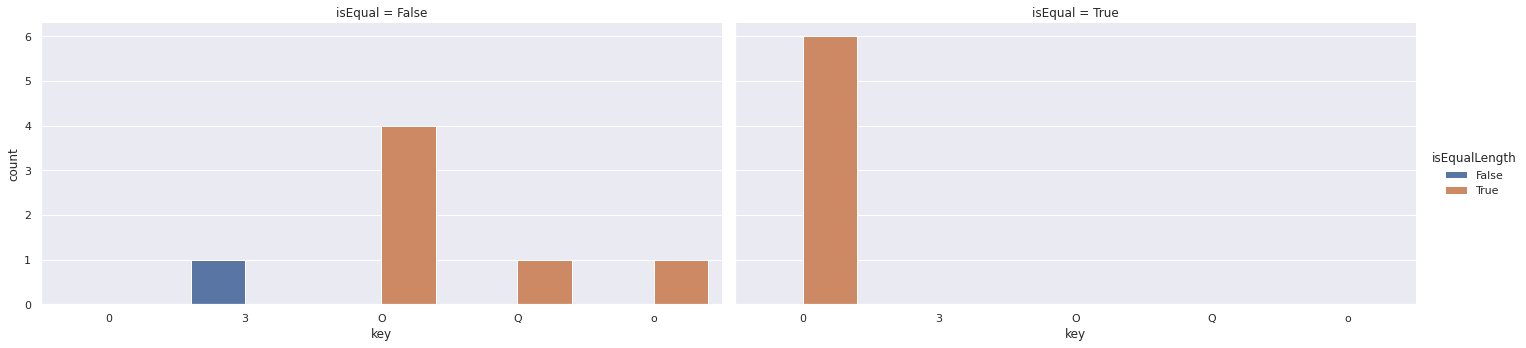

In [94]:

dfTemp = df.where(df['isEqualLength'] != 0)

keyDataZero = []

for col in df.itertuples(index=False):
  for idx, character in enumerate([char for char in col.textFromAzure]):
    if character == '0':
      keyDataZero.append({
          'isEqualLength': col.isEqualLength,
          'key': col.text[idx],
          'isEqual': col.equalityByLetters[idx]
      })
keyDfZero = pd.DataFrame(sorted(keyDataZero, key=lambda k: k['key']), index=None)
sns.catplot(x="key", col="isEqual", hue='isEqualLength',
                data=keyDfZero, kind="count", height=5, aspect=2); 

1aWtHl 1 aWtHI 6


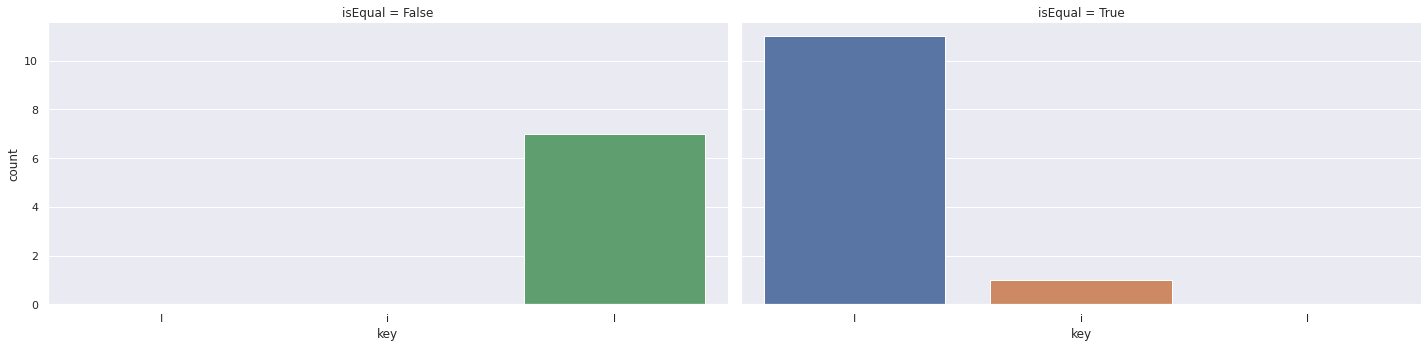

In [103]:
dfTemp = df.where(df['isEqualLength'] != 0)

keyDataZero = []

for col in df.itertuples(index=False):
  for idx, character in enumerate([char for char in col.textFromAzure]):
    if character == 'I':
      try:
        keyDataZero.append({
            'key': col.text[idx],
            'isEqual': col.equalityByLetters[idx]
        })
      except:
        print(col.text, col.textFromAzure, idx)

keyDfZero = pd.DataFrame(sorted(keyDataZero, key=lambda k: k['key']), index=None)
sns.catplot(x="key", col="isEqual",
                data=keyDfZero, kind="count", height=5, aspect=2); 